# Load Libraries

In [165]:
#imports
#numpy, pandas, math, math plotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#Models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#RFE
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Import Data

In [2]:
ImportedDataFrame = pd.read_csv('trainingData.csv', header=0)

print("Rows and Columns: ", ImportedDataFrame.shape)

ImportedDataFrame.head()



Rows and Columns:  (19937, 529)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [3]:
ImportedDataFrame.tail()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049
19936,100,100,100,100,100,100,100,100,100,100,...,100,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025


In [4]:
ImportedDataFrame.info(verbose=True, null_counts=True)
#19936 entries, 0 to 19935
#Columns: 529 entries, 100 to 1371713733

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 529 columns):
WAP001              19937 non-null int64
WAP002              19937 non-null int64
WAP003              19937 non-null int64
WAP004              19937 non-null int64
WAP005              19937 non-null int64
WAP006              19937 non-null int64
WAP007              19937 non-null int64
WAP008              19937 non-null int64
WAP009              19937 non-null int64
WAP010              19937 non-null int64
WAP011              19937 non-null int64
WAP012              19937 non-null int64
WAP013              19937 non-null int64
WAP014              19937 non-null int64
WAP015              19937 non-null int64
WAP016              19937 non-null int64
WAP017              19937 non-null int64
WAP018              19937 non-null int64
WAP019              19937 non-null int64
WAP020              19937 non-null int64
WAP021              19937 non-null int64
WAP022              19937 non

# EDA

BUILDINGID
0    5249
1    5196
2    9492
Name: BUILDINGID, dtype: int64


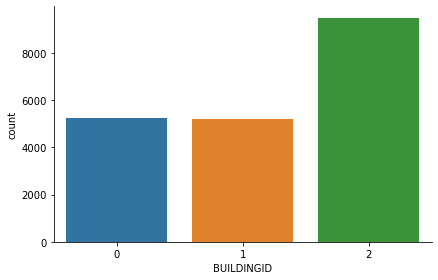

In [166]:
print(ImportedDataFrame.groupby(['BUILDINGID'])['BUILDINGID'].count())
sns.factorplot('BUILDINGID', data=ImportedDataFrame, kind='count', aspect=1.5)

FLOOR
0    4369
1    5002
2    4416
3    5048
4    1102
Name: FLOOR, dtype: int64


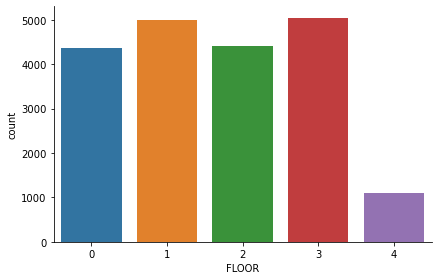

In [167]:
print(ImportedDataFrame.groupby(['FLOOR'])['FLOOR'].count())
sns.factorplot('FLOOR', data=ImportedDataFrame, kind='count', aspect=1.5)

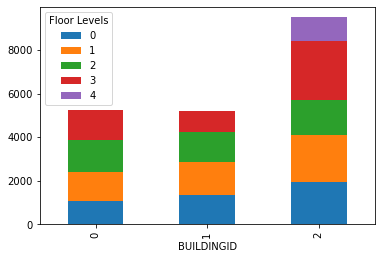

In [189]:
#defaulted = testdf[testdf['default payment next month']==1]
credittable2 = pd.crosstab(index=[ImportedDataFrame.BUILDINGID], columns=[ImportedDataFrame.FLOOR])
credittable2.unstack()
credittable2

credittable2.plot.bar(stacked=True)
plt.legend(title='Floor Levels')

plt.show()

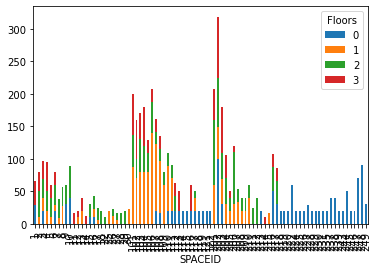

<Figure size 144000x144000 with 0 Axes>

In [188]:
defaulted = ImportedDataFrame[ImportedDataFrame['BUILDINGID']==1]
credittable2 = pd.crosstab(index=[defaulted.SPACEID], columns=[defaulted.FLOOR])
credittable2.unstack()
credittable2

credittable2.plot.bar(stacked=True)
plt.legend(title='Floors')
plt.figure(figsize=(2000,2000))
plt.show()

# Sampling

In [5]:
# Building 1
Building1 = ImportedDataFrame[ImportedDataFrame.BUILDINGID == 1]
Building1.shape

(5196, 529)

In [6]:
# Building 2
Building2 = ImportedDataFrame[ImportedDataFrame.BUILDINGID == 2]
Building2.shape

(9492, 529)

In [7]:
# Building 0
Building0 = ImportedDataFrame[ImportedDataFrame.BUILDINGID == 0]
Building0.shape

(5249, 529)

In [21]:
# Selected Building as Dataset
BDS = Building1

# Processing

In [22]:
# Remove Obious Features (E.G. ID and Others)
BDS = BDS.drop(columns=['USERID'], axis=1) #Remove UserID
BDS = BDS.drop(columns=['PHONEID'], axis=1) #Remove PhoneID
BDS = BDS.drop(columns=['TIMESTAMP'], axis=1) #Remove Timestamp
BDS = BDS.drop(columns=['LONGITUDE'], axis=1) #Remove LONGITUDE
BDS = BDS.drop(columns=['LATITUDE'], axis=1) #Remove LATITUDE
BDS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 0 to 19936
Columns: 524 entries, WAP001 to RELATIVEPOSITION
dtypes: int64(524)
memory usage: 20.8 MB


In [23]:
BDS.tail()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
19930,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,4,2
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,1,2
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,13,2
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,113,2
19936,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,112,2


In [24]:
#Merge multiple location fields into One
LocationDF = BDS
#LocationDF['LOCATIONID']=LocationDF.apply(lambda x:'%s_%s_%s_%s' % (LocationDF['FLOOR'],LocationDF['BUILDINGID'],LocationDF['SPACEID'],LocationDF['RELATIVEPOSITION']),axis=1)
LocationDF['LOCATIONID'] = LocationDF[['BUILDINGID','FLOOR','SPACEID','RELATIVEPOSITION']].astype(str).apply(lambda x: '_'.join(x), axis = 1)

In [25]:
LocationDF['LOCATIONID'] = LocationDF.LOCATIONID.astype('category')

In [26]:
LocationDF.tail()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,LOCATIONID
19930,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,3,1,4,2,1_3_4_2
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,3,1,1,2,1_3_1_2
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,3,1,13,2,1_3_13_2
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,3,1,113,2,1_3_113_2
19936,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,3,1,112,2,1_3_112_2


In [27]:
# Remove Columns that made Location ID
BDF = LocationDF
BDF = BDF.drop(columns=['BUILDINGID'], axis=1) #Remove BUILDINGID
BDF = BDF.drop(columns=['SPACEID'], axis=1) #Remove SPACEID
BDF = BDF.drop(columns=['FLOOR'], axis=1) #Remove FLOOR
BDF = BDF.drop(columns=['RELATIVEPOSITION'], axis=1) #Remove RELATIVEPOSITION
BDF.shape

(5196, 521)

In [28]:
BDF.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 0 to 19936
Data columns (total 521 columns):
WAP001        5196 non-null int64
WAP002        5196 non-null int64
WAP003        5196 non-null int64
WAP004        5196 non-null int64
WAP005        5196 non-null int64
WAP006        5196 non-null int64
WAP007        5196 non-null int64
WAP008        5196 non-null int64
WAP009        5196 non-null int64
WAP010        5196 non-null int64
WAP011        5196 non-null int64
WAP012        5196 non-null int64
WAP013        5196 non-null int64
WAP014        5196 non-null int64
WAP015        5196 non-null int64
WAP016        5196 non-null int64
WAP017        5196 non-null int64
WAP018        5196 non-null int64
WAP019        5196 non-null int64
WAP020        5196 non-null int64
WAP021        5196 non-null int64
WAP022        5196 non-null int64
WAP023        5196 non-null int64
WAP024        5196 non-null int64
WAP025        5196 non-null int64
WAP026        5196 non-null int64
WAP027 

# Feature Selection

### OOB Dataset:

In [29]:
#OOB
BDF

# Create X -  Independent Features
#Create Y - Dependent Feature
X = BDF
X = BDF.drop(columns=['LOCATIONID'], axis=1)
print(X.shape)
#(5196, 520)
Y =  BDF['LOCATIONID']
print(Y.shape)
#(5196,)

(5196, 520)
(5196,)


### RFE Dataset:

In [148]:
#OOB
RFEInit = BDF



# Create X -  Independent Features
#Create Y - Dependent Feature
RFE_X = RFEInit
RFE_X = RFE_X.drop(columns=['LOCATIONID'], axis=1)
print(RFE_X.shape)
#(5196, 520)
RFE_Y =  RFEInit['LOCATIONID']
#RFE_Y = RFEInit.iloc[:,520:521]
print(RFE_Y.shape)
#(5196,)

estimator1 = RandomForestClassifier()
#estimator1 = SVR(kernel="linear")
selector = RFE(estimator1, step=1)
selector = selector.fit(RFE_X, RFE_Y)


(5196, 520)
(5196,)


In [145]:
RFE_Y

,LOCATIONID
0,1_2_106_2
1,1_2_106_2
2,1_2_103_2
3,1_2_102_2
5,1_2_105_2
6,1_2_103_2
7,1_2_101_2
8,1_2_112_2
9,1_2_103_1
10,1_2_104_1


In [155]:
RFEx = selector.transform(RFE_X)
RFE_X3 = RFE_X[RFE_X.columns[selector.get_support(1)]] 
RFEx2 = RFE_X3
#RFEx2 = RFE_X.iloc[:, RFEx]
#RFEx2 = pd.DataFrame(RFEx, columns=RFE_X)
#RFEx2 = pd.DataFrame(RFEx, columns = RFE_X.columns, index = RFE_X.index)

#RFEx2 = pd.DataFrame(RFEx, columns=[RFE_X.columns[i] for i in range(len(RFE_X.columns)) if selector.get_support()[i]])


In [156]:
RFEx2.head()
RFEx2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 0 to 19936
Data columns (total 260 columns):
WAP006    5196 non-null int64
WAP007    5196 non-null int64
WAP008    5196 non-null int64
WAP009    5196 non-null int64
WAP010    5196 non-null int64
WAP011    5196 non-null int64
WAP012    5196 non-null int64
WAP013    5196 non-null int64
WAP014    5196 non-null int64
WAP015    5196 non-null int64
WAP016    5196 non-null int64
WAP017    5196 non-null int64
WAP018    5196 non-null int64
WAP019    5196 non-null int64
WAP020    5196 non-null int64
WAP021    5196 non-null int64
WAP022    5196 non-null int64
WAP023    5196 non-null int64
WAP024    5196 non-null int64
WAP025    5196 non-null int64
WAP026    5196 non-null int64
WAP027    5196 non-null int64
WAP028    5196 non-null int64
WAP029    5196 non-null int64
WAP030    5196 non-null int64
WAP031    5196 non-null int64
WAP032    5196 non-null int64
WAP033    5196 non-null int64
WAP034    5196 non-null int64
WAP035    5196 non-nu

# Train/Test Set

### OOB

In [34]:
#split into Training and Test frames

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30, random_state=1,stratify=Y)

In [31]:
#Train
print("X Train: ",X_train.shape)
print("y Train: ",y_train.shape)

X Train:  (3637, 520)
y Train:  (3637,)


In [35]:
#Test
print("X Test: ",X_test.shape)
print("y Test: ",y_test.shape)

X Test:  (1559, 520)
y Test:  (1559,)


### RFE

In [157]:
RFE_X_train, RFE_X_test, RFE_y_train, RFE_y_test = train_test_split(RFEx2, RFE_Y,test_size=0.30, random_state=1,stratify=RFE_Y)

In [115]:
#Train
print("X Train: ",RFE_X_train.shape)
print("y Train: ",RFE_y_train.shape)

X Train:  (3637, 260)
y Train:  (3637,)


In [134]:
RFE_y_test

15070    1_0_237_2
3557     1_0_246_2
4103     1_0_216_2
15486    1_0_222_1
15675    1_0_218_2
790       1_2_29_2
3536     1_0_248_2
7809     1_0_114_2
15374    1_0_243_2
10623    1_1_108_2
19325      1_3_2_2
4247     1_0_246_2
13635    1_1_110_1
15461    1_0_217_2
149        1_2_8_2
15592    1_0_226_1
4273     1_1_210_2
5677     1_2_202_1
4696     1_3_113_1
15688    1_0_235_2
19499    1_3_103_2
1547       1_2_3_2
5359     1_2_206_2
699       1_2_17_1
19639    1_3_102_1
143        1_2_5_2
4102     1_0_247_1
19673    1_3_106_2
12337      1_1_8_2
14446    1_1_110_1
           ...    
244       1_2_22_2
3306     1_1_210_2
3280     1_0_243_2
11510    1_1_101_1
1488     1_2_102_2
5572     1_2_203_1
5166     1_2_206_1
9712     1_1_111_2
19313      1_3_3_2
3552     1_0_216_2
19769    1_3_102_2
14747    1_0_217_2
14438    1_1_105_2
1646     1_2_103_1
9153     1_0_107_2
14285    1_1_108_1
1022       1_2_8_2
1422     1_2_103_2
4134     1_1_209_2
15057    1_0_219_2
10139    1_1_101_2
6779     1_2

# OOB Dataset on OOB Models

### OOB Dataset and OOB SVC:

In [36]:


#Model Fitting SVC - Default
modelLSVC = LinearSVC()
modelLSVC.fit(X_train,y_train)
print(cross_val_score(modelLSVC, X_train, y_train.values.ravel(),cv=10))
modelLSVC.score(X_train,y_train)

Dep_pred = modelLSVC.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelLSVC, X_train, y_train.values.ravel()))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[0.46978022 0.48901099 0.53296703 0.4478022  0.57142857 0.46428571
 0.53021978 0.38016529 0.4600551  0.55096419]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.51648352 0.41620879 0.46629986 0.4869326  0.48005502]
Test set accuracy: 0.60
              precision    recall  f1-score   support

   1_0_107_2       0.67      1.00      0.80         6
   1_0_108_2       1.00      0.60      0.75         5
    1_0_10_1       0.67      0.67      0.67         6
    1_0_10_2       0.57      0.67      0.62         6
   1_0_110_2       0.75      0.50      0.60         6
   1_0_111_2       0.40      0.67      0.50         6
   1_0_112_2       0.55      1.00      0.71         6
   1_0_113_2       1.00      0.17      0.29         6
   1_0_114_2       0.80      0.67      0.73         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       0.00      0.00      0.00         6
   1_0_117_2       0.43      1.00      0.60         6
   1_0_118_2       0.71      0.83      0.77         6
   1_0_119_2       1.00      0.67      0.80         6
   1_0_121_2       1.00      0.67      0.80         6
   1_0_122_2       0.29      0.83      0.43         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### OOB Dataset and OOB KNN:

In [39]:

modelKNN = KNeighborsClassifier()

#Model Fitting KNN - Default
modelKNN.fit(X_train,y_train)
print(cross_val_score(modelKNN, X_train, y_train,cv=10))
modelKNN.score(X_train,y_train)

Dep_pred = modelKNN.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelKNN, X_train, y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.62637363 0.65659341 0.63736264 0.62912088 0.62637363 0.63186813
 0.6456044  0.62258953 0.65564738 0.63360882]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.625      0.59615385 0.62861073 0.64236589 0.6258597 ]
Test set accuracy: 0.65
              precision    recall  f1-score   support

   1_0_107_2       0.86      1.00      0.92         6
   1_0_108_2       1.00      0.60      0.75         5
    1_0_10_1       0.83      0.83      0.83         6
    1_0_10_2       0.75      0.50      0.60         6
   1_0_110_2       0.55      1.00      0.71         6
   1_0_111_2       0.43      0.50      0.46         6
   1_0_112_2       0.50      0.33      0.40         6
   1_0_113_2       0.50      0.50      0.50         6
   1_0_114_2       0.67      1.00      0.80         6
   1_0_115_2       1.00      0.83      0.91         6
   1_0_116_2       0.60      0.50      0.55         6
   1_0_117_2       0.46      1.00      0.63         6
   1_0_118_2       1.00      0.83      0.91         6
   1_0_119_2       0.75      0.50      0.60         6
   1_0_121_2       0.80      0.67      0.73         6
   1_0_122_2       0.30      0.50      0.37         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### OOB Dataset and OOB RandomForest:

In [40]:

modelRF = RandomForestClassifier()

#Model Fitting RF - Default
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train,cv=10))
modelRF.score(X_train,y_train)

Dep_pred = modelRF.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelRF, X_train, y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.84340659 0.8543956  0.85989011 0.84340659 0.87362637 0.87637363
 0.84615385 0.84297521 0.85399449 0.84297521]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.83653846 0.84478022 0.85419532 0.8610729  0.82530949]
Test set accuracy: 0.85
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      0.80      0.89         5
    1_0_10_1       1.00      1.00      1.00         6
    1_0_10_2       1.00      0.83      0.91         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      1.00      1.00         6
   1_0_112_2       1.00      1.00      1.00         6
   1_0_113_2       1.00      0.83      0.91         6
   1_0_114_2       0.75      1.00      0.86         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results from OOB Datasets and OOB Classifiers:  
Test Accuracy:  
  SVC:0.60  
  KNN:0.65  
  RF:0.85

# OOB Dataset on Tuned Models

## SVC:

In [41]:
#Model Fitting SVC, max iter = 2
modelLSVC2 = LinearSVC(max_iter = 2)
modelLSVC2.fit(X_train,y_train)
print(cross_val_score(modelLSVC2, X_train, y_train.values.ravel(),cv=10))
modelLSVC2.score(X_train,y_train)

Dep_pred = modelLSVC2.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelLSVC2, X_train, y_train.values.ravel()))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[0.27197802 0.28846154 0.29945055 0.23901099 0.3489011  0.29120879
 0.33791209 0.28099174 0.1046832  0.26721763]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.1510989  0.29120879 0.26409904 0.32737276 0.29436039]
Test set accuracy: 0.35
              precision    recall  f1-score   support

   1_0_107_2       0.00      0.00      0.00         6
   1_0_108_2       0.00      0.00      0.00         5
    1_0_10_1       0.00      0.00      0.00         6
    1_0_10_2       0.36      0.83      0.50         6
   1_0_110_2       0.00      0.00      0.00         6
   1_0_111_2       0.00      0.00      0.00         6
   1_0_112_2       0.32      1.00      0.48         6
   1_0_113_2       0.00      0.00      0.00         6
   1_0_114_2       0.00      0.00      0.00         6
   1_0_115_2       0.00      0.00      0.00         6
   1_0_116_2       0.00      0.00      0.00         6
   1_0_117_2       0.00      0.00      0.00         6
   1_0_118_2       0.05      1.00      0.09         6
   1_0_119_2       0.00      0.00      0.00         6
   1_0_121_2       0.00      0.00      0.00         6
   1_0_122_2       0.00      0.00      0.00         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#Model Fitting SVC, max iter = 4
modelLSVC4 = LinearSVC(max_iter = 4)
modelLSVC4.fit(X_train,y_train)
print(cross_val_score(modelLSVC4, X_train, y_train.values.ravel(),cv=10))
modelLSVC4.score(X_train,y_train)

Dep_pred = modelLSVC4.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelLSVC4, X_train, y_train.values.ravel()))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[0.41483516 0.34065934 0.42857143 0.17307692 0.35714286 0.40934066
 0.38186813 0.26446281 0.38567493 0.47658402]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.37087912 0.4532967  0.16643741 0.45942228 0.33837689]
Test set accuracy: 0.46
              precision    recall  f1-score   support

   1_0_107_2       0.00      0.00      0.00         6
   1_0_108_2       0.56      1.00      0.71         5
    1_0_10_1       0.45      0.83      0.59         6
    1_0_10_2       0.00      0.00      0.00         6
   1_0_110_2       0.57      0.67      0.62         6
   1_0_111_2       0.10      0.17      0.12         6
   1_0_112_2       0.00      0.00      0.00         6
   1_0_113_2       0.00      0.00      0.00         6
   1_0_114_2       0.75      0.50      0.60         6
   1_0_115_2       0.62      0.83      0.71         6
   1_0_116_2       0.00      0.00      0.00         6
   1_0_117_2       0.00      0.00      0.00         6
   1_0_118_2       0.00      0.00      0.00         6
   1_0_119_2       1.00      0.17      0.29         6
   1_0_121_2       0.19      1.00      0.32         6
   1_0_122_2       0.25      0.67      0.36         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN:

In [43]:
#KNN Neighbors 3

modelKNN3 = KNeighborsClassifier(n_neighbors=3)

#Model Fitting KNN - Default
modelKNN3.fit(X_train,y_train)
print(cross_val_score(modelKNN3, X_train, y_train,cv=10))
modelKNN3.score(X_train,y_train)

Dep_pred = modelKNN3.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelKNN3, X_train, y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.63186813 0.69230769 0.65934066 0.62637363 0.6456044  0.66208791
 0.67032967 0.63085399 0.63911846 0.65564738]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.64697802 0.62225275 0.64649243 0.65337001 0.63548831]
Test set accuracy: 0.67
              precision    recall  f1-score   support

   1_0_107_2       0.75      1.00      0.86         6
   1_0_108_2       1.00      0.80      0.89         5
    1_0_10_1       1.00      0.83      0.91         6
    1_0_10_2       0.75      0.50      0.60         6
   1_0_110_2       0.60      1.00      0.75         6
   1_0_111_2       0.67      1.00      0.80         6
   1_0_112_2       0.60      0.50      0.55         6
   1_0_113_2       1.00      0.50      0.67         6
   1_0_114_2       0.75      1.00      0.86         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       0.50      0.67      0.57         6
   1_0_117_2       0.62      0.83      0.71         6
   1_0_118_2       0.86      1.00      0.92         6
   1_0_119_2       1.00      0.17      0.29         6
   1_0_121_2       1.00      0.67      0.80         6
   1_0_122_2       0.25      0.50      0.33         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#KNN Neighbors 5

modelKNN5 = KNeighborsClassifier(n_neighbors=5)

#Model Fitting KNN - Default
modelKNN5.fit(X_train,y_train)
print(cross_val_score(modelKNN5, X_train, y_train,cv=10))
modelKNN5.score(X_train,y_train)

Dep_pred = modelKNN5.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelKNN5, X_train, y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.62637363 0.65659341 0.63736264 0.62912088 0.62637363 0.63186813
 0.6456044  0.62258953 0.65564738 0.63360882]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.625      0.59615385 0.62861073 0.64236589 0.6258597 ]
Test set accuracy: 0.65
              precision    recall  f1-score   support

   1_0_107_2       0.86      1.00      0.92         6
   1_0_108_2       1.00      0.60      0.75         5
    1_0_10_1       0.83      0.83      0.83         6
    1_0_10_2       0.75      0.50      0.60         6
   1_0_110_2       0.55      1.00      0.71         6
   1_0_111_2       0.43      0.50      0.46         6
   1_0_112_2       0.50      0.33      0.40         6
   1_0_113_2       0.50      0.50      0.50         6
   1_0_114_2       0.67      1.00      0.80         6
   1_0_115_2       1.00      0.83      0.91         6
   1_0_116_2       0.60      0.50      0.55         6
   1_0_117_2       0.46      1.00      0.63         6
   1_0_118_2       1.00      0.83      0.91         6
   1_0_119_2       0.75      0.50      0.60         6
   1_0_121_2       0.80      0.67      0.73         6
   1_0_122_2       0.30      0.50      0.37         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RF

In [45]:
#RF 120 Trees
modelRF120 = RandomForestClassifier(n_estimators = 120)

#Model Fitting RF - Default
modelRF120.fit(X_train,y_train)
print(cross_val_score(modelRF120, X_train, y_train,cv=10))
modelRF120.score(X_train,y_train)

Dep_pred = modelRF120.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelRF120, X_train, y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.8489011  0.8543956  0.86538462 0.85989011 0.85714286 0.88736264
 0.84615385 0.84848485 0.86225895 0.83471074]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.83241758 0.84752747 0.8610729  0.85557084 0.83631362]
Test set accuracy: 0.86
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      1.00      1.00         5
    1_0_10_1       1.00      1.00      1.00         6
    1_0_10_2       1.00      1.00      1.00         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      1.00      1.00         6
   1_0_112_2       0.75      1.00      0.86         6
   1_0_113_2       1.00      0.67      0.80         6
   1_0_114_2       1.00      1.00      1.00         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#RF 80 Trees
modelRF80 = RandomForestClassifier(n_estimators = 80)

#Model Fitting RF - Default
modelRF80.fit(X_train,y_train)
print(cross_val_score(modelRF80, X_train, y_train,cv=10))
modelRF80.score(X_train,y_train)

Dep_pred = modelRF80.predict(X_test)
acc = accuracy_score(y_test, Dep_pred)
print(cross_val_score(modelRF80, X_train, y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.8489011  0.8543956  0.8489011  0.84615385 0.8543956  0.89010989
 0.84615385 0.84573003 0.84848485 0.83471074]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.82554945 0.84340659 0.85144429 0.85557084 0.83081155]
Test set accuracy: 0.86
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      1.00      1.00         5
    1_0_10_1       1.00      1.00      1.00         6
    1_0_10_2       1.00      0.83      0.91         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      0.83      0.91         6
   1_0_112_2       0.75      1.00      0.86         6
   1_0_113_2       0.80      0.67      0.73         6
   1_0_114_2       1.00      1.00      1.00         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Summary of OOB Datasets with Tuned Classifiers:  
Accuracy:  
  SVC - Max Tier 2: 0.35 <br>
  SVC - Max Tier 4: 0.46  
  KNN Neighbors 3: 0.67  
  KNN Neighbors 5: 0.65  
  RF 120 Trees: 0.86  
  RF 80 Trres: 0.86


# RFE Dataset with OOB Classifiers

In [123]:
#Model Fitting SVC - Default
modelLSVC_RFE = LinearSVC()

#Model Fitting SVC - Default
modelLSVC_RFE.fit(RFE_X_train,RFE_y_train)
print(cross_val_score(modelLSVC_RFE, RFE_X_train, RFE_y_train,cv=10))
modelLSVC_RFE.score(RFE_X_train,RFE_y_train)

Dep_pred = modelLSVC_RFE.predict(RFE_X_test)
acc = accuracy_score(RFE_y_test, Dep_pred)
print(cross_val_score(modelLSVC_RFE, RFE_X_train, RFE_y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(RFE_y_test, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

[0.46978022 0.49175824 0.4478022  0.57692308 0.46428571 0.46428571
 0.46428571 0.45454545 0.52341598 0.55096419]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.43681319 0.41346154 0.51856946 0.41953232 0.46629986]
Test set accuracy: 0.52
              precision    recall  f1-score   support

   1_0_107_2       0.67      0.67      0.67         6
   1_0_108_2       1.00      0.40      0.57         5
    1_0_10_1       1.00      0.50      0.67         6
    1_0_10_2       0.80      0.67      0.73         6
   1_0_110_2       1.00      0.50      0.67         6
   1_0_111_2       0.50      0.67      0.57         6
   1_0_112_2       0.50      0.50      0.50         6
   1_0_113_2       1.00      0.17      0.29         6
   1_0_114_2       0.57      0.67      0.62         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       0.00      0.00      0.00         6
   1_0_117_2       0.35      1.00      0.52         6
   1_0_118_2       0.71      0.83      0.77         6
   1_0_119_2       1.00      0.67      0.80         6
   1_0_121_2       1.00      0.83      0.91         6
   1_0_122_2       0.40      0.33      0.36         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
modelKNN_RFE = KNeighborsClassifier()

#Model Fitting KNN - Default
modelKNN_RFE.fit(RFE_X_train,RFE_y_train)
print(cross_val_score(modelKNN_RFE, RFE_X_train, RFE_y_train,cv=10))
modelKNN_RFE.score(RFE_X_train,RFE_y_train)

Dep_pred = modelKNN_RFE.predict(RFE_X_test)
acc = accuracy_score(RFE_y_test, Dep_pred)
print(cross_val_score(modelKNN_RFE, RFE_X_train, RFE_y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(RFE_y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.62637363 0.65659341 0.63736264 0.62912088 0.62637363 0.63186813
 0.6456044  0.62258953 0.65564738 0.63360882]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.625      0.59615385 0.62861073 0.64236589 0.6258597 ]
Test set accuracy: 0.65
              precision    recall  f1-score   support

   1_0_107_2       0.86      1.00      0.92         6
   1_0_108_2       1.00      0.60      0.75         5
    1_0_10_1       0.83      0.83      0.83         6
    1_0_10_2       0.75      0.50      0.60         6
   1_0_110_2       0.55      1.00      0.71         6
   1_0_111_2       0.43      0.50      0.46         6
   1_0_112_2       0.50      0.33      0.40         6
   1_0_113_2       0.50      0.50      0.50         6
   1_0_114_2       0.67      1.00      0.80         6
   1_0_115_2       1.00      0.83      0.91         6
   1_0_116_2       0.60      0.50      0.55         6
   1_0_117_2       0.46      1.00      0.63         6
   1_0_118_2       1.00      0.83      0.91         6
   1_0_119_2       0.75      0.50      0.60         6
   1_0_121_2       0.80      0.67      0.73         6
   1_0_122_2       0.30      0.50      0.37         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:

modelRF_RFE = RandomForestClassifier()

#Model Fitting RF - Default
modelRF_RFE.fit(RFE_X_train,RFE_y_train)
print(cross_val_score(modelRF_RFE, RFE_X_train, RFE_y_train,cv=10))
modelRF_RFE.score(RFE_X_train,RFE_y_train)

Dep_pred = modelRF_RFE.predict(RFE_X_test)
acc = accuracy_score(RFE_y_test, Dep_pred)
print(cross_val_score(modelRF_RFE, RFE_X_train, RFE_y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(RFE_y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.8543956  0.84615385 0.8489011  0.84340659 0.86813187 0.88461538
 0.8489011  0.85123967 0.84022039 0.8292011 ]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.8282967  0.84615385 0.86795048 0.85969739 0.83356259]
Test set accuracy: 0.86
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      1.00      1.00         5
    1_0_10_1       1.00      0.83      0.91         6
    1_0_10_2       0.86      1.00      0.92         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      1.00      1.00         6
   1_0_112_2       0.67      1.00      0.80         6
   1_0_113_2       1.00      0.50      0.67         6
   1_0_114_2       1.00      1.00      1.00         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RFE Dataset with Tuned Models

### I decided to pick Random Forest as my Model

In [124]:
modelRF120_RFE = RandomForestClassifier(n_estimators = 120)

#Model Fitting RF - Default
modelRF120_RFE.fit(RFE_X_train,RFE_y_train)
print(cross_val_score(modelRF120_RFE, RFE_X_train, RFE_y_train,cv=10))
modelRF120_RFE.score(RFE_X_train,RFE_y_train)

Dep_pred = modelRF120_RFE.predict(RFE_X_test)
acc = accuracy_score(RFE_y_test, Dep_pred)
print(cross_val_score(modelRF120_RFE, RFE_X_train, RFE_y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(RFE_y_test, Dep_pred))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.84065934 0.85714286 0.85989011 0.86538462 0.85714286 0.88186813
 0.8489011  0.82644628 0.85674931 0.84022039]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.84478022 0.83653846 0.84869326 0.85419532 0.83906465]
Test set accuracy: 0.87
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      0.80      0.89         5
    1_0_10_1       1.00      1.00      1.00         6
    1_0_10_2       1.00      0.83      0.91         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      1.00      1.00         6
   1_0_112_2       0.86      1.00      0.92         6
   1_0_113_2       1.00      0.83      0.91         6
   1_0_114_2       0.86      1.00      0.92         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
#RF 80 Trees
modelRF80_RFE = RandomForestClassifier(n_estimators = 80)

#Model Fitting RF - Default
modelRF80_RFE.fit(RFE_X_train,RFE_y_train)
print(cross_val_score(modelRF80_RFE, RFE_X_train, RFE_y_train,cv=10))
modelRF80_RFE.score(RFE_X_train,RFE_y_train)

Dep_pred = modelRF80_RFE.predict(RFE_X_test)
acc = accuracy_score(RFE_y_test, Dep_pred)
print(cross_val_score(modelRF80_RFE, RFE_X_train, RFE_y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(RFE_y_test, Dep_pred))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.85989011 0.84615385 0.84615385 0.85164835 0.8489011  0.86813187
 0.8543956  0.84297521 0.85674931 0.84022039]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.82417582 0.83516484 0.85281981 0.85281981 0.83218707]
Test set accuracy: 0.85
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      0.80      0.89         5
    1_0_10_1       1.00      0.83      0.91         6
    1_0_10_2       1.00      0.83      0.91         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      1.00      1.00         6
   1_0_112_2       0.86      1.00      0.92         6
   1_0_113_2       1.00      0.83      0.91         6
   1_0_114_2       0.86      1.00      0.92         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predictions

In [158]:
modelRF120_RFE = RandomForestClassifier(n_estimators = 120)

#Model Fitting RF - Default
modelRF120_RFE.fit(RFE_X_train,RFE_y_train)
print(cross_val_score(modelRF120_RFE, RFE_X_train, RFE_y_train,cv=10))
modelRF120_RFE.score(RFE_X_train,RFE_y_train)

pred_y = modelRF120_RFE.predict(RFE_X_test)
acc = accuracy_score(RFE_y_test, pred_y)
print(cross_val_score(modelRF120_RFE, RFE_X_train, RFE_y_train))
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(RFE_y_test, pred_y))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.84615385 0.8489011  0.85989011 0.85989011 0.8543956  0.88461538
 0.84340659 0.85123967 0.85674931 0.84297521]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.84752747 0.83928571 0.85557084 0.86382393 0.8349381 ]
Test set accuracy: 0.86
              precision    recall  f1-score   support

   1_0_107_2       1.00      1.00      1.00         6
   1_0_108_2       1.00      1.00      1.00         5
    1_0_10_1       1.00      1.00      1.00         6
    1_0_10_2       1.00      0.83      0.91         6
   1_0_110_2       1.00      1.00      1.00         6
   1_0_111_2       1.00      0.83      0.91         6
   1_0_112_2       0.75      1.00      0.86         6
   1_0_113_2       0.80      0.67      0.73         6
   1_0_114_2       1.00      1.00      1.00         6
   1_0_115_2       1.00      1.00      1.00         6
   1_0_116_2       1.00      1.00      1.00         6
   1_0_117_2       1.00      1.00      1.00         6
   1_0_118_2       1.00      1.00      1.00         6
   1_0_119_2       1.00      0.83      0.91         6
   1_0_121_2       1.00      1.00      1.00         6
   1_0_122_2       0.86      1.00      0.92         6


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
print(RFE_y_test)

15070    1_0_237_2
3557     1_0_246_2
4103     1_0_216_2
15486    1_0_222_1
15675    1_0_218_2
790       1_2_29_2
3536     1_0_248_2
7809     1_0_114_2
15374    1_0_243_2
10623    1_1_108_2
19325      1_3_2_2
4247     1_0_246_2
13635    1_1_110_1
15461    1_0_217_2
149        1_2_8_2
15592    1_0_226_1
4273     1_1_210_2
5677     1_2_202_1
4696     1_3_113_1
15688    1_0_235_2
19499    1_3_103_2
1547       1_2_3_2
5359     1_2_206_2
699       1_2_17_1
19639    1_3_102_1
143        1_2_5_2
4102     1_0_247_1
19673    1_3_106_2
12337      1_1_8_2
14446    1_1_110_1
           ...    
244       1_2_22_2
3306     1_1_210_2
3280     1_0_243_2
11510    1_1_101_1
1488     1_2_102_2
5572     1_2_203_1
5166     1_2_206_1
9712     1_1_111_2
19313      1_3_3_2
3552     1_0_216_2
19769    1_3_102_2
14747    1_0_217_2
14438    1_1_105_2
1646     1_2_103_1
9153     1_0_107_2
14285    1_1_108_1
1022       1_2_8_2
1422     1_2_103_2
4134     1_1_209_2
15057    1_0_219_2
10139    1_1_101_2
6779     1_2

In [163]:
#y_test_OOB
RFE_X_test
PredSample2 = RFE_X_test
PredSample2['y'] = RFE_y_test
PredSample2['Pred'] = pred_y
#print(PredSample)
PredSample2

#Sample = RFE_y_test
#Sample['Pred'] = pred_y

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP490,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,y,Pred
15070,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_237_2,1_0_237_2
3557,-70,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_246_2,1_0_216_2
4103,-68,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_216_2,1_0_216_2
15486,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_222_1,1_0_222_1
15675,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_218_2,1_0_218_2
790,100,100,100,100,-97,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_2_29_2,1_2_29_2
3536,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_248_2,1_0_248_2
7809,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_114_2,1_0_114_2
15374,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,1_0_243_2,1_0_243_2
10623,100,100,100,100,100,100,100,100,100,-95,...,100,100,100,100,100,100,100,100,1_1_108_2,1_1_108_2
